In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create known parameters
weight =0.7
bias=0.3

start=0
end=1
step=0.02

data=torch.arange(start,end,step).unsqueeze(dim=1)
label=weight*data+bias

In [3]:
#creating partitoned training set and test set
train_split=int(0.8*len(data))
#training set
train_data=data[:train_split]
train_label=label[:train_split]
#test set
test_data=data[train_split:]
test_label=label[train_split:]


In [4]:
len(train_data),len(train_label),len(test_data),len(test_label)

(40, 40, 10, 10)

In [5]:
#function to plot data
def plot_pred(test_data=test_data,
              train_data=train_data,
              test_label=test_label,
              train_label=train_label,
              predictions=None):
  plt.figure(figsize=(8,5))
  plt.scatter(train_data,train_label,c="r",s=4,label="train_data")
  plt.scatter(test_data,test_label,c="g",s=4,label="test_data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="b",s=4,label="predictions")

  plt.legend(prop={"size":10})

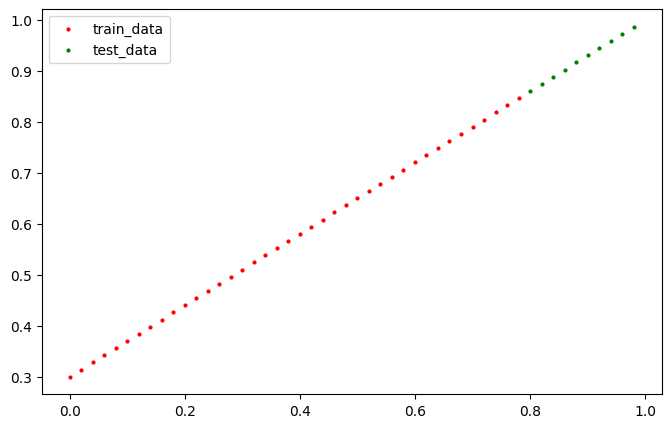

In [6]:
plot_pred()

In [7]:
#creating linear regression module
class LinearRegressionModule(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True)
    self.bias=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True)
    #overwriting forward function
  def forward(self,val:torch.Tensor)->torch.Tensor:
    return self.weights * val + self.bias

In [8]:
#creating model instance
torch.manual_seed=42
model_0=LinearRegressionModule()

list(model_0.parameters())

[Parameter containing:
 tensor([0.6815], requires_grad=True),
 Parameter containing:
 tensor([0.5850], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6815])), ('bias', tensor([0.5850]))])

In [10]:
with torch.inference_mode():
  pred_val=model_0(test_data)

In [11]:
print(f"Number of testing samples: {len(test_data)}")
print(f"Number of predictions made: {len(pred_val)}")
print(f"Predicted values:\n{pred_val}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.1302],
        [1.1438],
        [1.1575],
        [1.1711],
        [1.1847],
        [1.1984],
        [1.2120],
        [1.2256],
        [1.2393],
        [1.2529]])


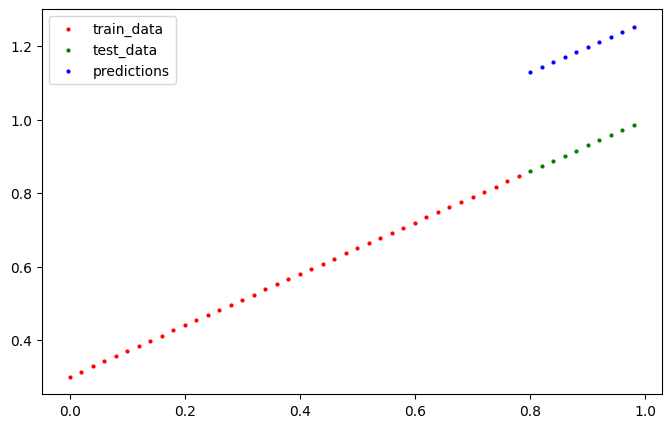

In [12]:
plot_pred(predictions=pred_val)

In [13]:
test_label-pred_val

tensor([[-0.2702],
        [-0.2698],
        [-0.2695],
        [-0.2691],
        [-0.2687],
        [-0.2684],
        [-0.2680],
        [-0.2676],
        [-0.2673],
        [-0.2669]])

In [14]:
#creating loss function and optimiser and implementing in training loop
loss_fn=nn.L1Loss()
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

torch.manual_seed=42
epochs=2000
#empty values to keep track
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  pred_val=model_0(train_data)
  loss=loss_fn(pred_val,train_data)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model_0.eval()
  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(test_data)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, test_label.type(torch.float))
      if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.46077975630760193 | MAE Test Loss: 0.13384178280830383 
Epoch: 10 | MAE Train Loss: 0.07207493484020233 | MAE Test Loss: 0.19129517674446106 
Epoch: 20 | MAE Train Loss: 0.03775552660226822 | MAE Test Loss: 0.11544005572795868 
Epoch: 30 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 40 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 50 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 60 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 70 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 80 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 90 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 100 | MAE Train Loss: 0.049099151045084 | MAE Test Loss: 0.017661988735198975 
Epoch: 110 | MAE Train Loss: 0.049099151045084 | MAE Test Loss

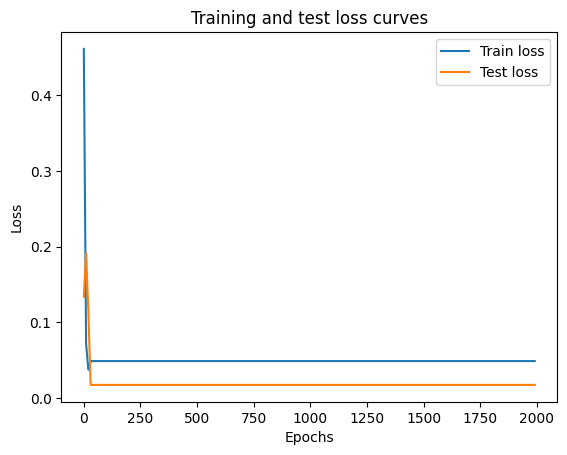

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.9254])), ('bias', tensor([-0.0200]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [17]:
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  pred_val = model_0(test_data)
pred_val

tensor([[0.7203],
        [0.7388],
        [0.7574],
        [0.7759],
        [0.7944],
        [0.8129],
        [0.8314],
        [0.8499],
        [0.8684],
        [0.8869]])

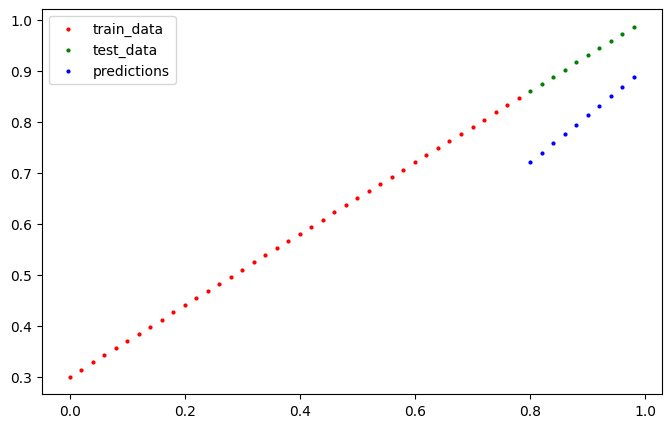

In [18]:
plot_pred(predictions=pred_val)

In [19]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [20]:
loaded_model_1 = LinearRegressionModule()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModule()
Model on device:
cpu


In [21]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(test_data)
pred_val == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])